## Import Libraries

In [1]:
!pip install gensim

In [2]:
!pip install wordcloud

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn
import re
import string
import tqdm
import os.path
import math
import nltk
import scipy

from gensim.models import Word2Vec

from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from wordcloud import WordCloud

nltk.download('stopwords')
nltk.download('wordnet')

from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.utils import resample
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score, roc_curve, auc, make_scorer

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sanso\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sanso\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Import Train and Test Dataset

In [4]:
train_path = "C:/Users/sanso/Desktop/CODSOFT/MOVIE GENRE CLASSIFICATION/Genre Classification Dataset/train_data.txt"
df_train = pd.read_csv(train_path, sep=':::', names=['Id', 'Title', 'Genre', 'Description'], engine='python')
df_train

,Id,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...,...
54209,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54210,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54212,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [5]:
df_train.to_csv('df_train.csv', index=False)

print(df_train)

          Id                                         Title          Genre  \
0          1                 Oscar et la dame rose (2009)          drama    
1          2                                 Cupid (1997)       thriller    
2          3             Young, Wild and Wonderful (1980)          adult    
3          4                        The Secret Sin (1915)          drama    
4          5                       The Unrecovered (2007)          drama    
...      ...                                           ...            ...   
54209  54210                              "Bonino" (1953)         comedy    
54210  54211                  Dead Girls Don't Cry (????)         horror    
54211  54212    Ronald Goedemondt: Ze bestaan echt (2008)    documentary    
54212  54213                     Make Your Own Bed (1944)         comedy    
54213  54214   Nature's Fury: Storm of the Century (2006)        history    

                                             Description  
0       Listenin

In [6]:
test_path = "C:/Users/sanso/Desktop/CODSOFT/MOVIE GENRE CLASSIFICATION/Genre Classification Dataset/test_data.txt"
df_test = pd.read_csv(test_path, sep=':::', names=['Id', 'Title', 'Description'], engine='python')
df_test

,Id,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...
...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da..."
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...
54197,54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard..."


In [7]:
df_test.to_csv('df_test.csv', index=False)

print(df_test)

          Id                             Title  \
0          1             Edgar's Lunch (1998)    
1          2         La guerra de papá (1977)    
2          3      Off the Beaten Track (2010)    
3          4           Meu Amigo Hindu (2015)    
4          5                Er nu zhai (1955)    
...      ...                               ...   
54195  54196   "Tales of Light & Dark" (2013)    
54196  54197      Der letzte Mohikaner (1965)    
54197  54198              Oliver Twink (2007)    
54198  54199                Slipstream (1973)    
54199  54200        Curitiba Zero Grau (2010)    

                                             Description  
0       L.R. Brane loves his life - his car, his apar...  
1       Spain, March 1964: Quico is a very naughty ch...  
2       One year in the life of Albin and his family ...  
3       His father has died, he hasn't spoken with hi...  
4       Before he was known internationally as a mart...  
...                                          

## Explore Train and Test Dataset

In [8]:
df_train.columns

Index(['Id', 'Title', 'Genre', 'Description'], dtype='object')

In [9]:
print("Shape of train dataset: ", df_train.shape)

Shape of train dataset:  (54214, 4)


In [10]:
print("="*60)
print("First Five Rows")
df_train.head(5)

First Five Rows


,Id,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [11]:
print("Information About Dataset", "\n")
print("="*30)
df_train.info()

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           54214 non-null  int64 
 1   Title        54214 non-null  object
 2   Genre        54214 non-null  object
 3   Description  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [12]:
print("Describe the Dataset", "\n")
print("="*30)
df_train.describe()

Describe the Dataset 



,Id
count,54214.000000
mean,27107.500000
std,15650.378084
min,1.000000
25%,13554.250000
50%,27107.500000
75%,40660.750000
max,54214.000000


In [13]:
print("Null Values", "\n")
print("="*30)
df_train.isnull().sum()

Null Values 



Id             0
Title          0
Genre          0
Description    0
dtype: int64

In [14]:
df_train['Genre'].unique()

array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

In [15]:
df_test.columns

Index(['Id', 'Title', 'Description'], dtype='object')

In [16]:
print("Shape of test dataset: ", df_test.shape)

Shape of test dataset:  (54200, 3)


In [17]:
print("First Five Rows", "\n")
print("="*70)
df_test.head(5)

First Five Rows 



,Id,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [18]:
print("Information About Dataset", "\n")
print("="*40)
df_test.info()

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           54200 non-null  int64 
 1   Title        54200 non-null  object
 2   Description  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [19]:
print("Describe the Dataset", "\n")
print("="*30)
df_test.describe()

Describe the Dataset 



,Id
count,54200.000000
mean,27100.500000
std,15646.336632
min,1.000000
25%,13550.750000
50%,27100.500000
75%,40650.250000
max,54200.000000


In [20]:
print("Null Values", "\n")
print("="*30)
df_test.isnull().sum()

Null Values 



Id             0
Title          0
Description    0
dtype: int64

In [21]:
df_train.Genre.value_counts()

 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: Genre, dtype: int64

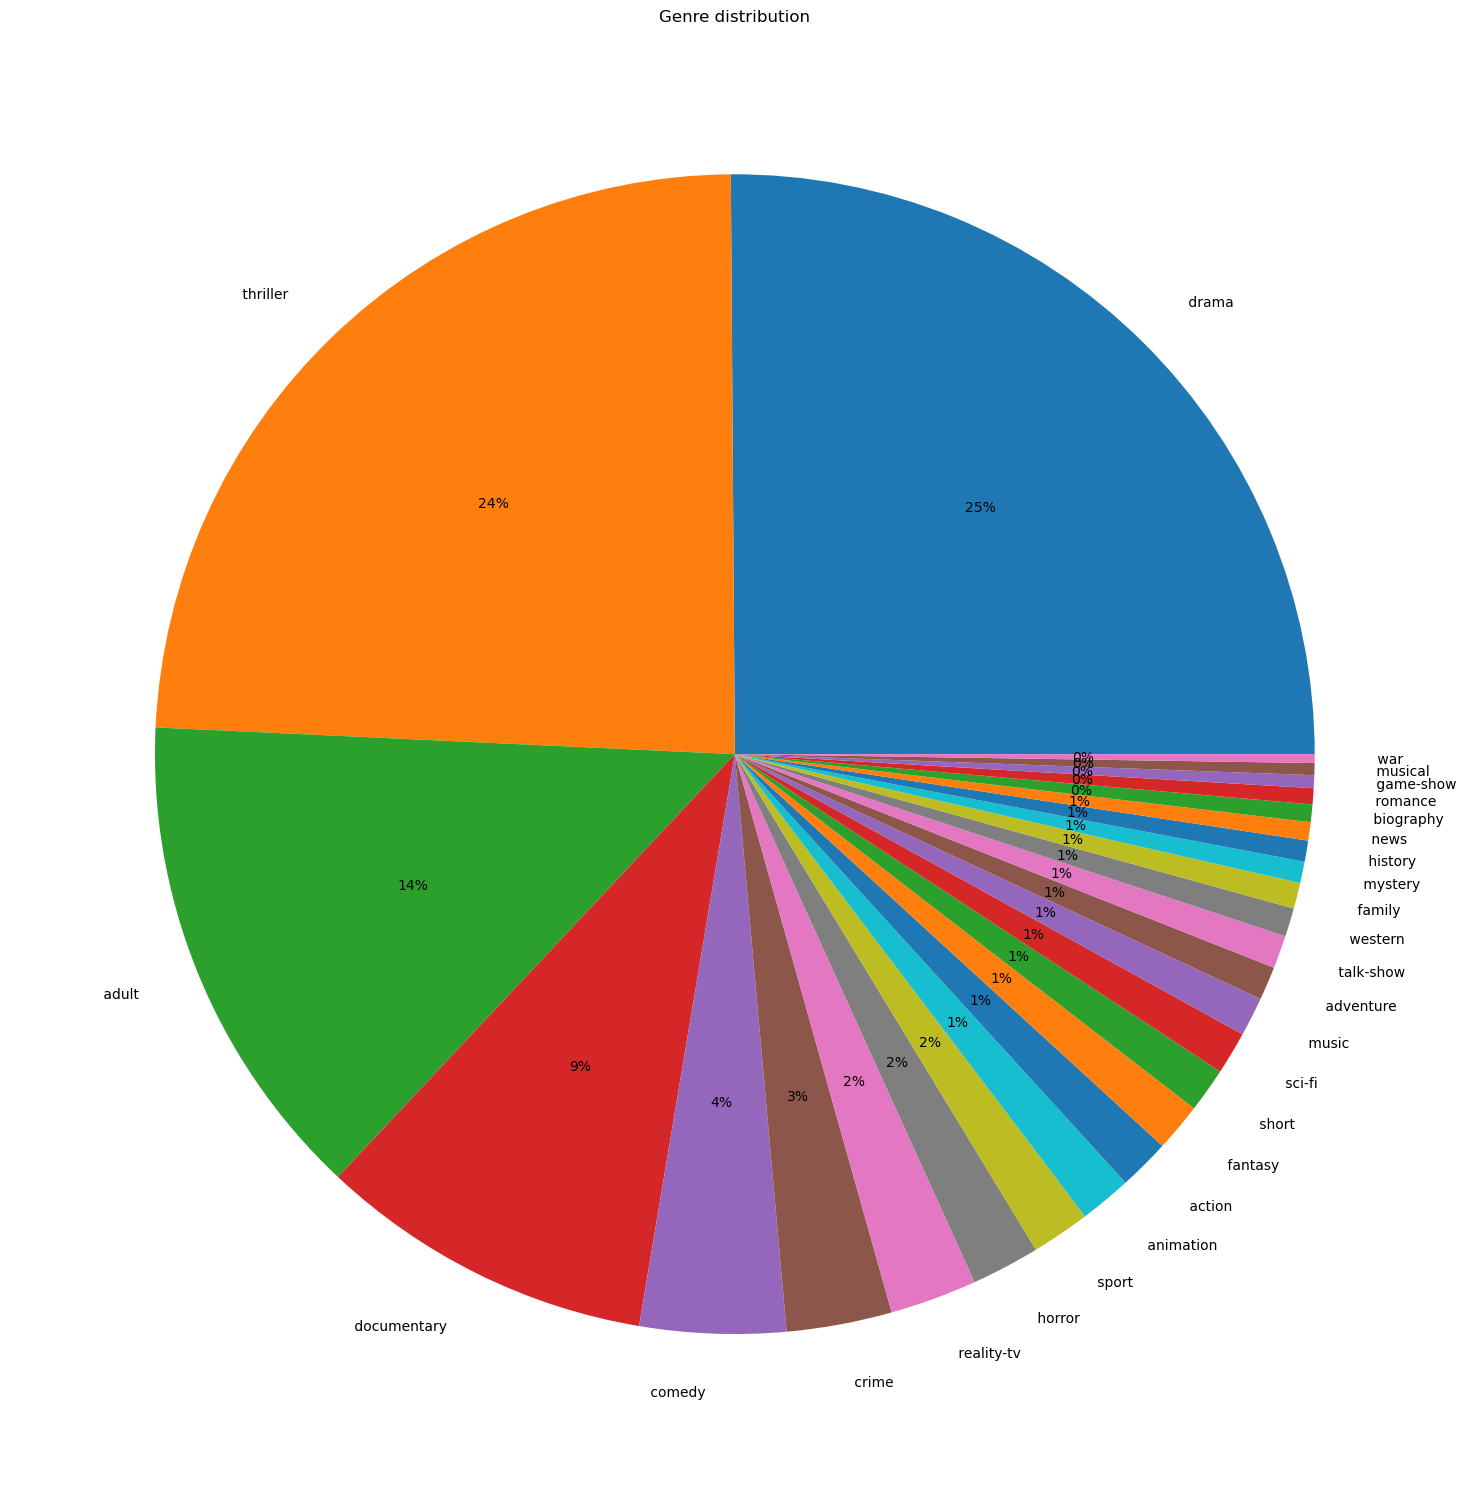

In [22]:
# Genre distribution

plt.figure(figsize = (15,15))

plt.pie(df_train['Genre'].value_counts().values, labels = [' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ', ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ', ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ', ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '],autopct='%0.0f%%')

plt.title("Genre distribution")
plt.tight_layout()  # Adjust layout to prevent overlapping

plt.show()

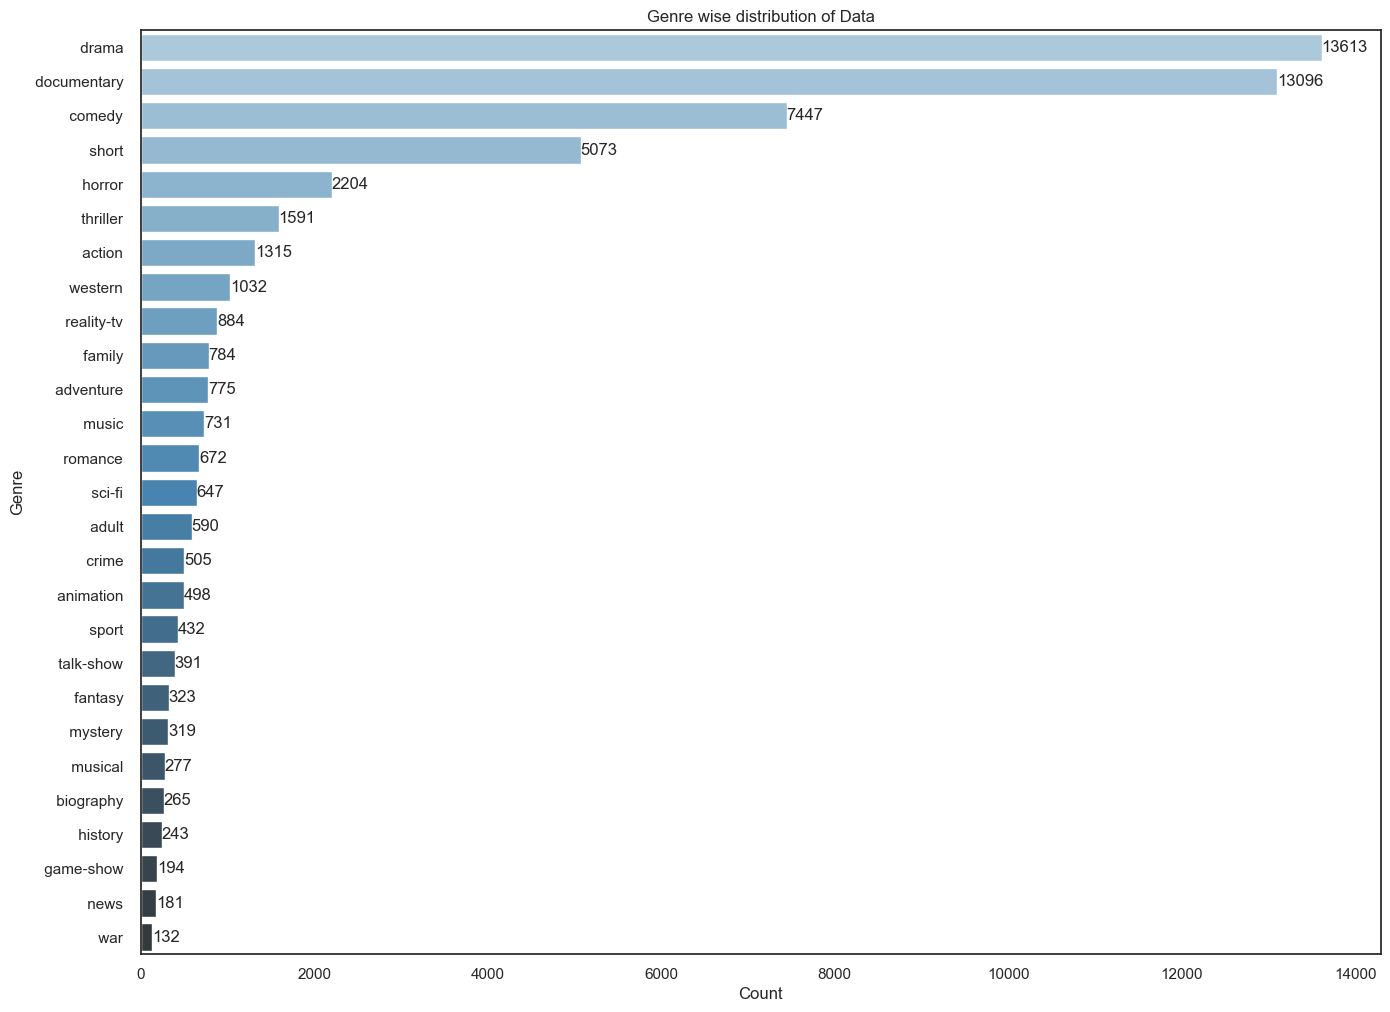

In [23]:
#Genre wise distribution

sns.set(style="white")
genre_to_count=pd.DataFrame({'Genre':df_train['Genre'].value_counts().index, 'Count':df_train['Genre'].value_counts().values})

plt.figure(figsize=(16,12))

plt.title('Genre wise distribution of Data')

ax = sns.barplot(y="Genre", x="Count", data=genre_to_count, palette="Blues_d")
for i in ax.containers:
    ax.bar_label(i, )

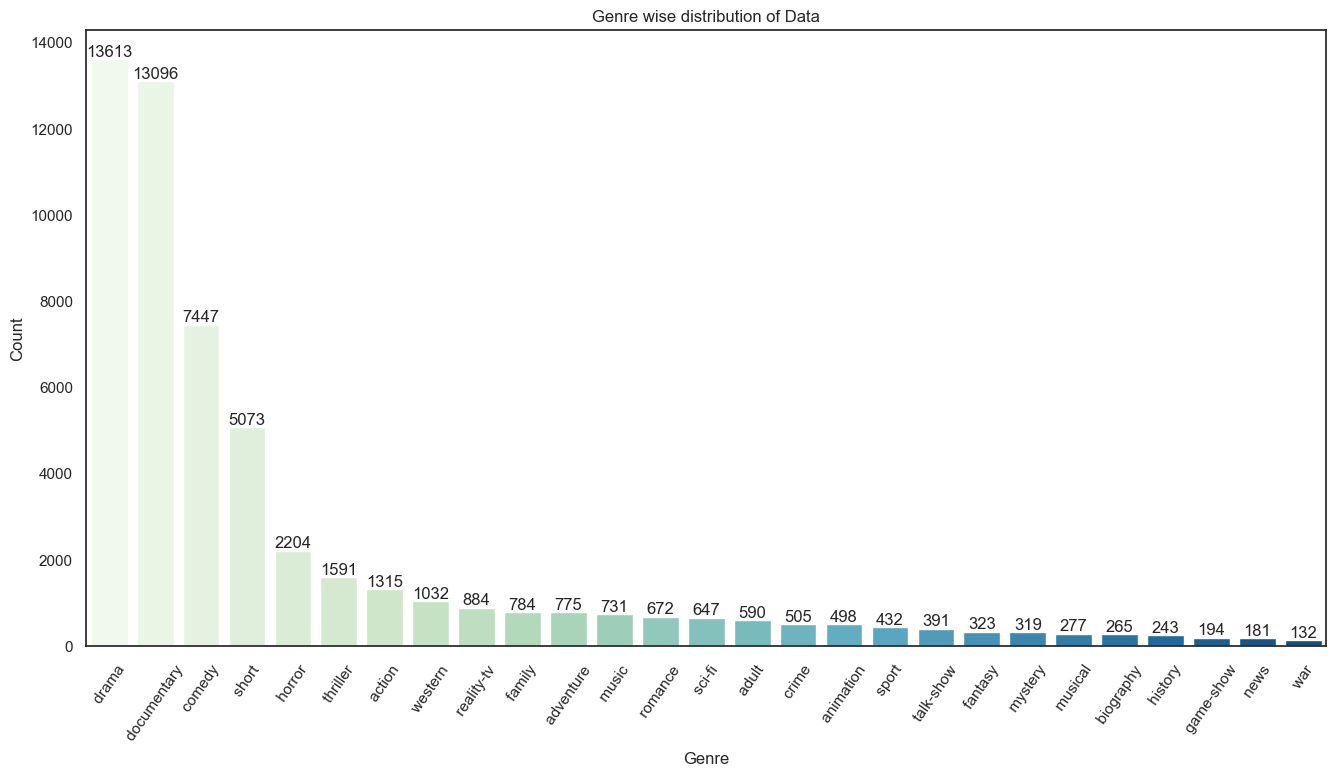

In [24]:
#Genre wise distribution
Genre = df_train['Genre'].value_counts().to_frame().reset_index()

Genre.columns = ['Genre','Count']

plt.figure(figsize = (16,8))

plt.title('Genre wise distribution of Data')
plt.xticks(rotation = 55)

ax=sns.barplot(x = Genre['Genre'],y = Genre['Count'],palette='GnBu')
for i in ax.containers:
    ax.bar_label(i, )

In [25]:
df_train['length']=df_train['Description'].apply(len)
df_train.head()

,Id,Title,Genre,Description,length
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625


In [26]:
df_test['length']=df_test['Description'].apply(len)
df_test.head()

,Id,Title,Description,length
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",510
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",674
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,590
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",681
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,814


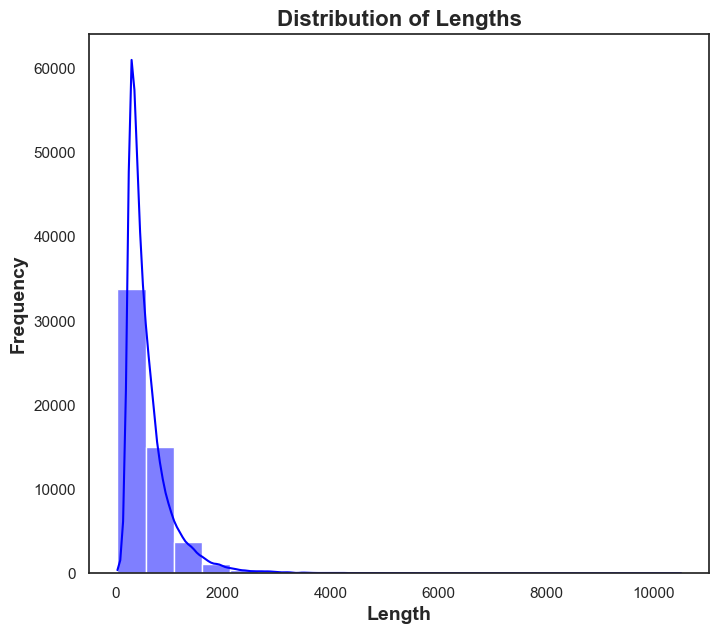

In [27]:
plt.figure(figsize=(8, 7))

sns.histplot(data=df_train, x='length', bins=20, kde=True, color='blue')

plt.xlabel('Length', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Distribution of Lengths', fontsize=16, fontweight='bold')

plt.show()

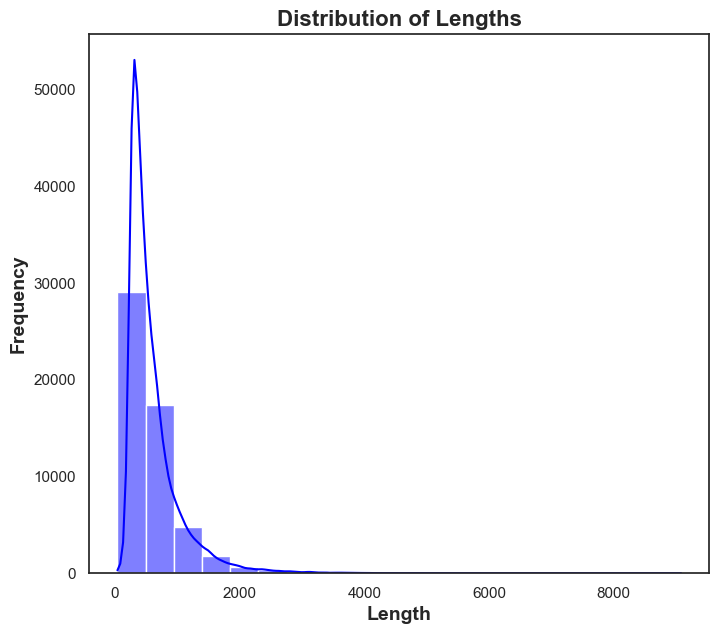

In [28]:
plt.figure(figsize=(8, 7))

sns.histplot(data=df_test, x='length', bins=20, kde=True, color='blue')

plt.xlabel('Length', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Distribution of Lengths', fontsize=16, fontweight='bold')

plt.show()

In [29]:
genre_counts = df_train['Genre'].value_counts().reset_index()

# Rename the columns
genre_counts.columns = ['Genre', 'Total']

print(genre_counts)

            Genre  Total
0          drama   13613
1    documentary   13096
2         comedy    7447
3          short    5073
4         horror    2204
5       thriller    1591
6         action    1315
7        western    1032
8     reality-tv     884
9         family     784
10     adventure     775
11         music     731
12       romance     672
13        sci-fi     647
14         adult     590
15         crime     505
16     animation     498
17         sport     432
18     talk-show     391
19       fantasy     323
20       mystery     319
21       musical     277
22     biography     265
23       history     243
24     game-show     194
25          news     181
26           war     132


In [30]:
print(df_train['Genre'].dtype)

object


In [31]:
df_train = df_train.dropna(subset=['Genre'])

# One-hot encode the genres (assuming genres are separated by commas in a single column)
df_genres = df_train['Genre'].str.get_dummies(sep=',')

# Verify the first few rows of the one-hot encoded genres DataFrame
df_genres.head()

,action,adult,adventure,animation,biography,comedy,crime,documentary,drama,family,...,news,reality-tv,romance,sci-fi,short,sport,talk-show,thriller,war,western
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
df_genres.shape

(54214, 27)

In [33]:
sum_genre = df_genres.sum()

# Verify the summed values
print(sum_genre)

 action           1315
 adult             590
 adventure         775
 animation         498
 biography         265
 comedy           7447
 crime             505
 documentary     13096
 drama           13613
 family            784
 fantasy           323
 game-show         194
 history           243
 horror           2204
 music             731
 musical           277
 mystery           319
 news              181
 reality-tv        884
 romance           672
 sci-fi            647
 short            5073
 sport             432
 talk-show         391
 thriller         1591
 war               132
 western          1032
dtype: int64


In [34]:
# Create a DataFrame from the summed values
df_movies_per_genre = pd.DataFrame({'Genre': sum_genre.index, 'Total': sum_genre.values})

# Verify the new DataFrame
print(df_movies_per_genre)

            Genre  Total
0         action    1315
1          adult     590
2      adventure     775
3      animation     498
4      biography     265
5         comedy    7447
6          crime     505
7    documentary   13096
8          drama   13613
9         family     784
10       fantasy     323
11     game-show     194
12       history     243
13        horror    2204
14         music     731
15       musical     277
16       mystery     319
17          news     181
18    reality-tv     884
19       romance     672
20        sci-fi     647
21         short    5073
22         sport     432
23     talk-show     391
24      thriller    1591
25           war     132
26       western    1032


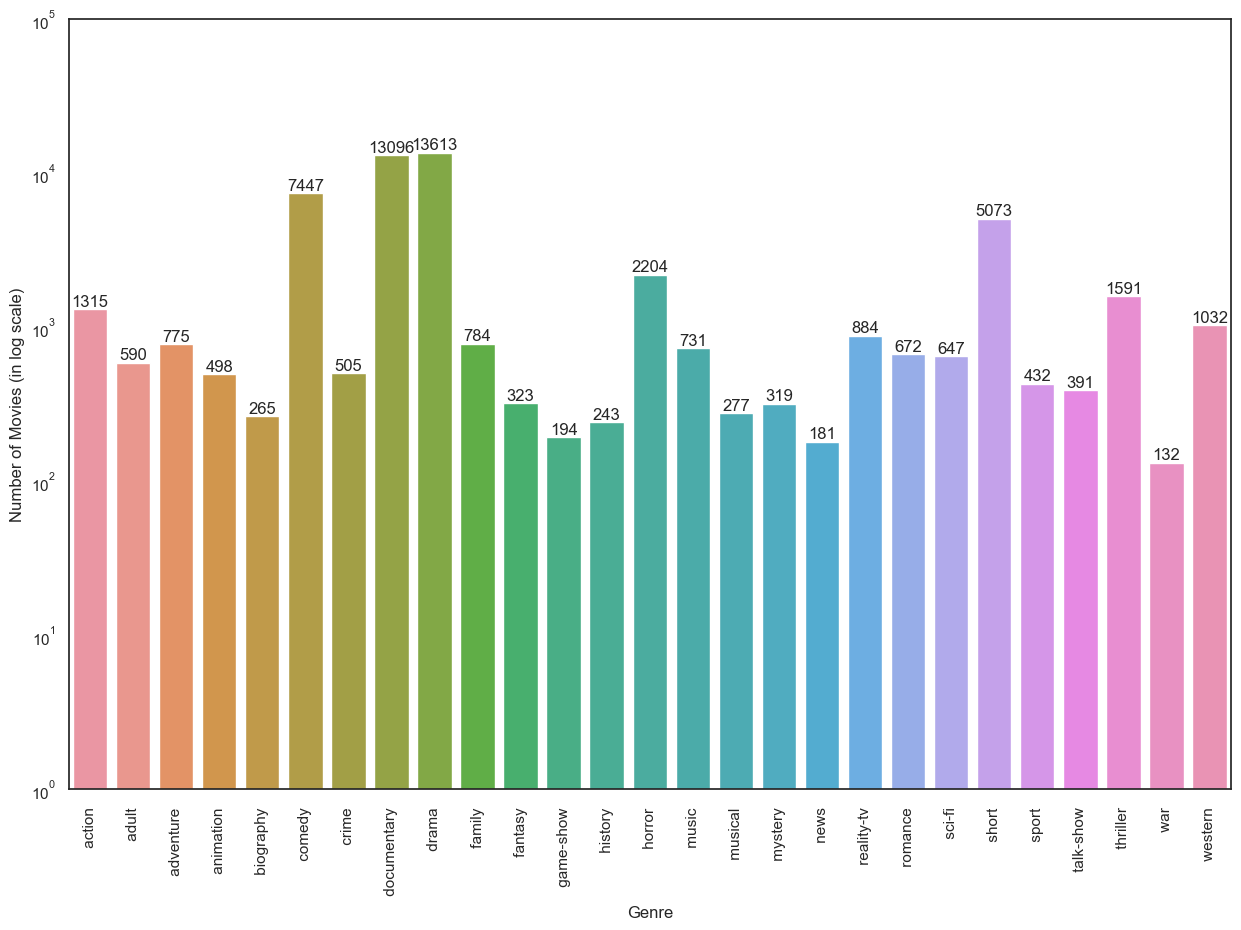

In [35]:
f, ax = plt.subplots(1, 1, figsize=(15, 10))
bx = sns.barplot(data=df_movies_per_genre, x='Genre', y='Total', axes=ax)

ax.set(yscale='log', ylim=(1, 1e5), ylabel='Number of Movies (in log scale)')

plt.xticks(rotation=90)

for i in bx.containers:
    bx.bar_label(i, )
    
plt.show()

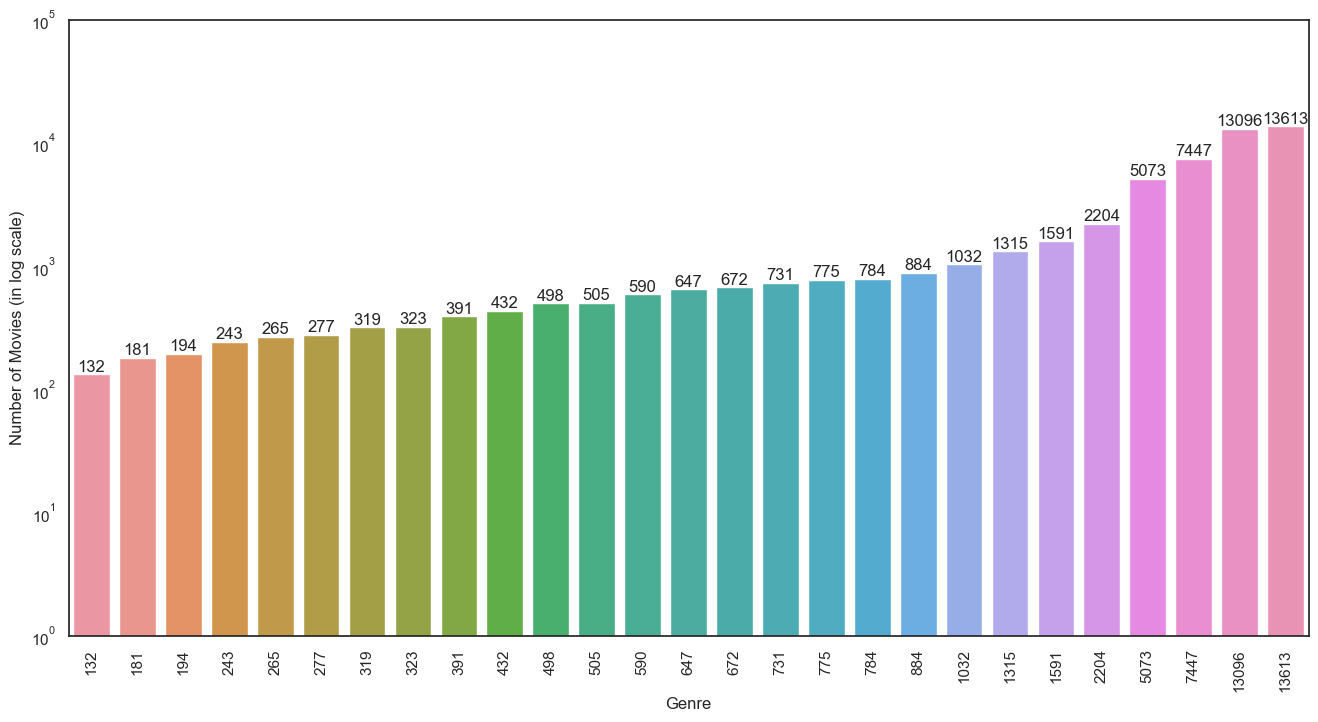

In [36]:
df_genres_per_movie = df_train['Genre'].value_counts()

f, ax = plt.subplots(1, 1, figsize=(16, 8))
bx = sns.barplot(data=df_genres_per_movie, x=df_genres_per_movie.index, y=df_genres_per_movie.values, ax=ax)
ax.set(yscale='log', ylim=(1, 1e5), xlabel='Genre', ylabel='Number of Movies (in log scale)')

for i in bx.containers:
    bx.bar_label(i, )

plt.xticks(rotation=90)

plt.show()

## Cleaning the text

In [35]:
stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
   
    text = text.lower()                                  # lower-case all characters
    text = re.sub('-',' ',text.lower())   # replace `word-word` as `word word`
    text = re.sub(f'[{string.digits}]',' ',text)  # remove digits
    text = ' '.join([stemmer.stem(word) for word in text.split() if word not in stop_words])  # remove stopwords and stem other words
    text =  re.sub(r'@\S+', '',text)                     # remove twitter handles
    text =  re.sub(r'http\S+', '',text)                  # remove urls
    text =  re.sub(r'pic.\S+', '',text) 
    text =  re.sub(r"[^a-zA-Z+']", ' ',text)             # only keeps characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text+' ')      # keep words with length>1 only
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.tokenize.word_tokenize(text,language="english", preserve_line=True)
    stopwords = nltk.corpus.stopwords.words('english')   # remove stopwords
    text = " ".join([i for i in words if i not in stopwords and len(i)>2])
    text= re.sub("\s[\s]+", " ",text).strip()            # remove repeated/leading/trailing spaces
    return re.sub(f'[{re.escape(string.punctuation)}]','',text) # remove punctuations


# Test your cleaning function
input_text = "Certainly you get a dramatic boost from hello bye the the hi -iv iem-k q934*2yee !*3 2e38"
print(f'Original text: {input_text}')
print(f'Cleaned text: {clean_text(input_text)}')

Original text: Certainly you get a dramatic boost from hello bye the the hi -iv iem-k q934*2yee !*3 2e38
Cleaned text: certain get dram boost hello bye iem


In [36]:
df_train['Text_cleaning'] = df_train.Description.apply(clean_text)
df_test['Text_cleaning'] = df_test.Description.apply(clean_text)

df_train.head()

,Id,Title,Genre,Description,length,Text_cleaning
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546,list convers doct parents year old osc learn n...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184,broth sist past incestu rel cur murd relations...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650,bus empty stud field trip muse nat history lit...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082,help unemploy fath mak end meet edi twin sist ...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625,films titl ref recov body ground zero also sta...


In [37]:
df_test.head()

,Id,Title,Description,length,Text_cleaning
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",510,bran lov lif car apartment job espec girlfrien...
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",674,spain march quico naughty child three belong w...
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,590,year lif albin famy shepherd transylvania dire...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",681,fath died spok broth year sery cancer diego ta...
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,814,known intern mart art superstar bruc lee appea...


In [38]:
df_train['length_Text_cleaning']=df_train['Text_cleaning'].apply(len)
df_train.head()

,Id,Title,Genre,Description,length,Text_cleaning,length_Text_cleaning
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546,list convers doct parents year old osc learn n...,324
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184,broth sist past incestu rel cur murd relations...,83
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650,bus empty stud field trip muse nat history lit...,325
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082,help unemploy fath mak end meet edi twin sist ...,616
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625,films titl ref recov body ground zero also sta...,282


In [39]:
df_test['length_Text_cleaning'] = df_test['Text_cleaning'].apply(len)
df_test.head()

,Id,Title,Description,length,Text_cleaning,length_Text_cleaning
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",510,bran lov lif car apartment job espec girlfrien...,240
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",674,spain march quico naughty child three belong w...,409
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,590,year lif albin famy shepherd transylvania dire...,327
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",681,fath died spok broth year sery cancer diego ta...,356
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,814,known intern mart art superstar bruc lee appea...,453


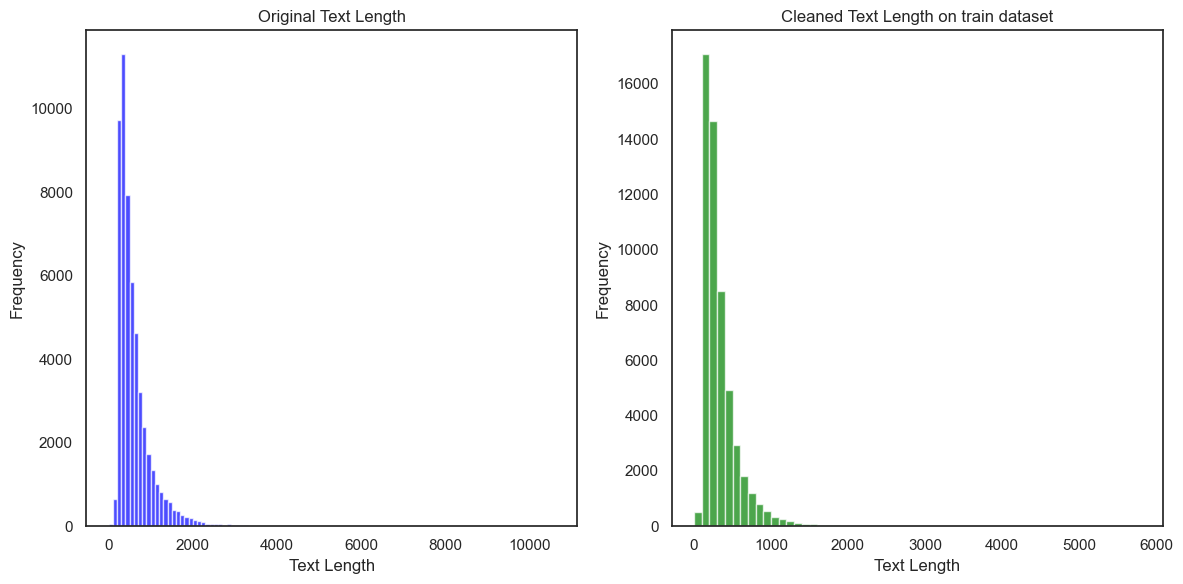

In [40]:
# Create histograms for text length before and after cleaning
plt.figure(figsize=(12, 6))

# Original text length distribution
plt.subplot(1, 2, 1)
original_lengths = df_train['Description'].apply(len)
plt.hist(original_lengths, bins=range(0, max(original_lengths) + 100, 100), color='blue', alpha=0.7)
plt.title('Original Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

# Cleaned text length distribution
plt.subplot(1, 2, 2)
cleaned_lengths = df_train['Text_cleaning'].apply(len)
plt.hist(cleaned_lengths, bins=range(0, max(cleaned_lengths) + 100, 100), color='green', alpha=0.7)
plt.title('Cleaned Text Length on train dataset')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [41]:
(df_train['length_Text_cleaning']>2000).value_counts()

False    54131
True        83
Name: length_Text_cleaning, dtype: int64

In [42]:
#Remove extremely long descriptions: outliers
print('Dataframe size (before removal): ',len(df_train))
filt=df_train['length_Text_cleaning']>2000
df_train.drop(df_train[filt].index,axis=0,inplace=True)     # filter rows having cleaned description length > 2000
print('Dataframe size (after removal): ',len(df_train))
print(f'Removed rows: {filt.sum()}')

Dataframe size (before removal):  54214
Dataframe size (after removal):  54131
Removed rows: 83


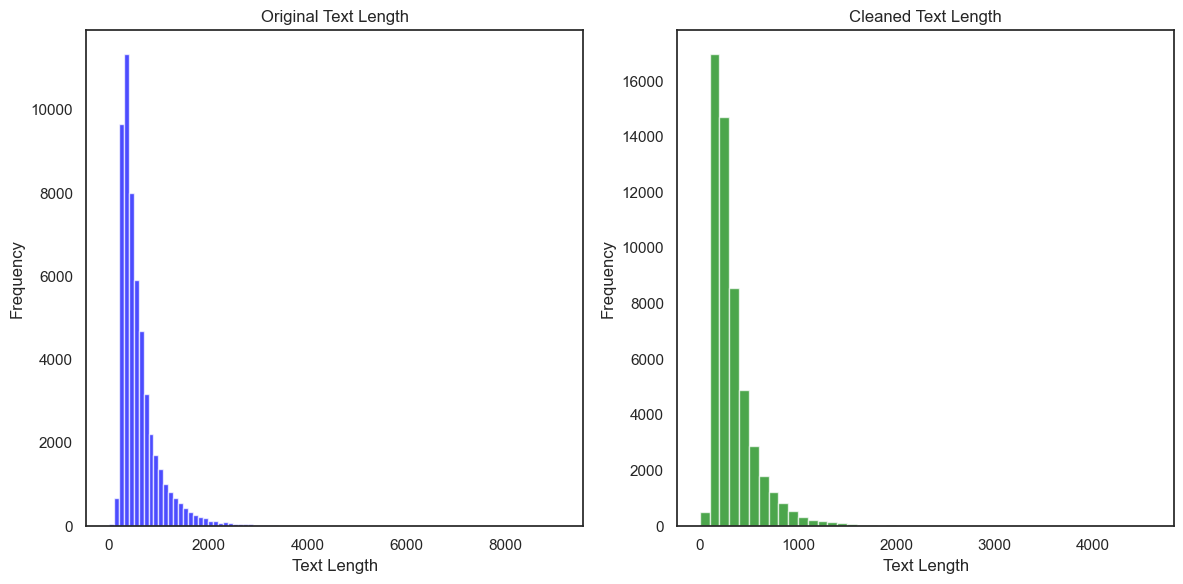

In [43]:
# Create histograms for text length before and after cleaning
plt.figure(figsize=(12, 6))

# Original text length distribution
plt.subplot(1, 2, 1)
original_lengths = df_test['Description'].apply(len)
plt.hist(original_lengths, bins=range(0, max(original_lengths) + 100, 100), color='blue', alpha=0.7)
plt.title('Original Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

# Cleaned text length distribution
plt.subplot(1, 2, 2)
cleaned_lengths = df_test['Text_cleaning'].apply(len)
plt.hist(cleaned_lengths, bins=range(0, max(cleaned_lengths) + 100, 100), color='green', alpha=0.7)
plt.title('Cleaned Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Removing HTML tags

In [44]:
def remove_tags(Description):
    html_tag = '<.*?>'
    cleaned_sentence = re.sub(html_tag, ' ',  Description)
    return cleaned_sentence

In [45]:
print(remove_tags('<html><h2>Learning NLP</h2></html>'))
print(remove_tags(' <a>Movie-Plot</a>'))

  Learning NLP  
  Movie-Plot 


In [46]:
def remove_punctuation(Description):
    cleaned_sentence = re.sub(r'[?|!|\'|"|#]', '', Description)
    cleaned_sentence = re.sub(r'[,|.|;|:|(|)|{|}|\|/|<|>]|-', ' ', cleaned_sentence)
    cleaned_sentence = cleaned_sentence.replace("\n"," ")
    return cleaned_sentence

In [47]:
def keep_alpha(Description):
    alpha_sentence = re.sub('[^a-z A-Z]+', ' ', Description)
    return alpha_sentence

In [48]:
def lower_case(Description):
    lower_case_sentence = Description.lower()
    return lower_case_sentence

In [49]:
def remove_stop_words(Description):
    stop_words = set(stopwords.words('english'))
    stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten',
                       'may','also','across','among','beside','however','yet','within'])
    no_stop_words=[word for word in sentence.split() if word not in stop_words]
    no_step_sentence = ' '.join(no_stop_words)
    return no_step_sentence

In [37]:
df_train['Title'].describe()

count                              54214
unique                             54214
top        Oscar et la dame rose (2009) 
freq                                   1
Name: Title, dtype: object

In [38]:
df_test['Title'].describe()

count                      54200
unique                     54200
top        Edgar's Lunch (1998) 
freq                           1
Name: Title, dtype: object

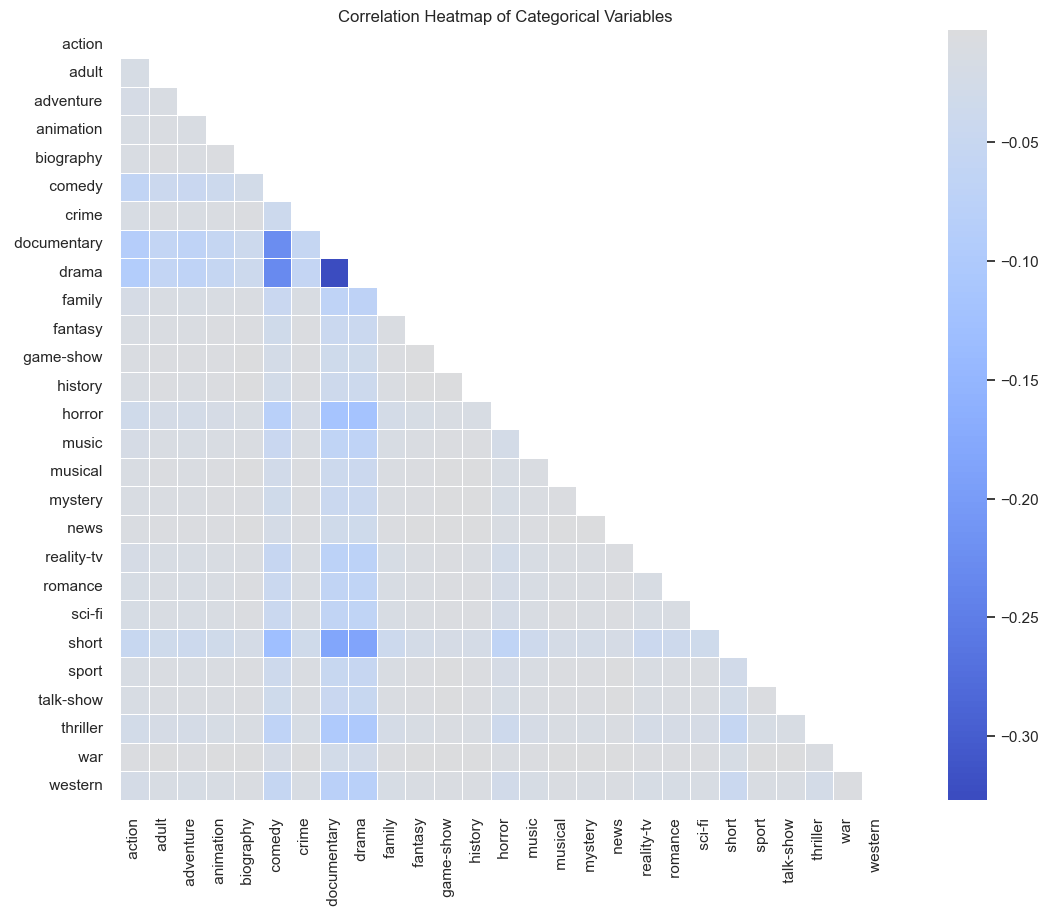

In [39]:
# Convert categorical columns to one-hot encoded format
df_train_encoded = pd.get_dummies(df_train['Genre'])

# Calculate the correlation matrix
corr_matrix = df_train_encoded.corr()

# Create a mask to hide the lower triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(15, 10))

sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", center=0, square=True, linewidths=.5)

plt.title("Correlation Heatmap of Categorical Variables")

plt.show()

## Initialize Text Vectorization(TF-IDF) vectorizer

In [40]:
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the training data
x_train_tfidf = tfidf_vectorizer.fit_transform(df_train['Description'])

# Transform the test data
y_train = df_train['Genre']

## Split Data and Train Model

In [41]:
x = x_train_tfidf
y = df_train['Genre']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [42]:
print("size of x: ", x.shape)
print("\nsize of y: ", y.shape)

size of x:  (54214, 5000)

size of y:  (54214,)


In [43]:
print("\nsize of x_train: ", x_train.shape)
print("\nsize of x_test: ",x_test.shape)
print("\nsize of y_train: ",y_train.shape)
print("\nsize of y_test: ",y_test.shape)


size of x_train:  (43371, 5000)

size of x_test:  (10843, 5000)

size of y_train:  (43371,)

size of y_test:  (10843,)


## Models

In [44]:
model_1 = MultinomialNB()
model_1.fit(x_train, y_train)

MultinomialNB()

In [45]:
model_2 = BernoulliNB()
model_2.fit(x_train, y_train)

BernoulliNB()

In [46]:
model_3 = LogisticRegression()
model_3.fit(x_train, y_train)

LogisticRegression()

In [47]:
model_4 = RandomForestClassifier()
model_4.fit(x_train, y_train)

RandomForestClassifier()

In [48]:
model_1 = MultinomialNB()
model_2 = BernoulliNB()

model_3 = LogisticRegression()
model_4 = RandomForestClassifier()

In [49]:
columns = ['Multinomial NB', 'Bernoulli NB', 'Logistic Regression', 'Random Forest Classifier']
accuracies=[]

In [50]:
def call(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)

    accuracies.append(accuracy)
    
    print("________MODEL EVALUATION ON TEST DATA________")
    print("Model: ")
    print(model)
    
    print("\nAccuracy of the Model: ")
    print(accuracy)

    print("\nClassification Report: ")
    print(classification_report(y_test, y_pred))

In [51]:
call(model_1)

________MODEL EVALUATION ON TEST DATA________
Model: 
MultinomialNB()

Accuracy of the Model: 
0.5120354145531679

Classification Report: 
               precision    recall  f1-score   support

      action        0.57      0.05      0.09       263
       adult        1.00      0.02      0.04       112
   adventure        0.44      0.03      0.05       139
   animation        0.00      0.00      0.00       104
   biography        0.00      0.00      0.00        61
      comedy        0.51      0.40      0.45      1443
       crime        0.00      0.00      0.00       107
 documentary        0.57      0.89      0.69      2659
       drama        0.45      0.84      0.58      2697
      family        0.00      0.00      0.00       150
     fantasy        0.00      0.00      0.00        74
   game-show        1.00      0.03      0.05        40
     history        0.00      0.00      0.00        45
      horror        0.77      0.27      0.40       431
       music        0.92      0.08 

In [52]:
call(model_2)

________MODEL EVALUATION ON TEST DATA________
Model: 
BernoulliNB()

Accuracy of the Model: 
0.5007839158904362

Classification Report: 
               precision    recall  f1-score   support

      action        0.34      0.42      0.37       263
       adult        0.54      0.46      0.49       112
   adventure        0.23      0.19      0.21       139
   animation        0.37      0.14      0.21       104
   biography        0.01      0.02      0.02        61
      comedy        0.50      0.53      0.51      1443
       crime        0.17      0.10      0.13       107
 documentary        0.75      0.65      0.70      2659
       drama        0.65      0.48      0.55      2697
      family        0.24      0.11      0.15       150
     fantasy        0.22      0.09      0.13        74
   game-show        0.52      0.30      0.38        40
     history        0.06      0.04      0.05        45
      horror        0.60      0.62      0.61       431
       music        0.33      0.73   

In [53]:
call(model_3)

________MODEL EVALUATION ON TEST DATA________
Model: 
LogisticRegression()

Accuracy of the Model: 
0.5905192289956654

Classification Report: 
               precision    recall  f1-score   support

      action        0.53      0.27      0.36       263
       adult        0.81      0.22      0.35       112
   adventure        0.39      0.14      0.20       139
   animation        0.58      0.07      0.12       104
   biography        0.00      0.00      0.00        61
      comedy        0.53      0.60      0.56      1443
       crime        0.12      0.01      0.02       107
 documentary        0.67      0.87      0.75      2659
       drama        0.56      0.78      0.65      2697
      family        0.36      0.09      0.14       150
     fantasy        0.00      0.00      0.00        74
   game-show        1.00      0.47      0.64        40
     history        0.00      0.00      0.00        45
      horror        0.65      0.57      0.61       431
       music        0.63      

In [54]:
call(model_4)

________MODEL EVALUATION ON TEST DATA________
Model: 
RandomForestClassifier()

Accuracy of the Model: 
0.475053029604353

Classification Report: 
               precision    recall  f1-score   support

      action        0.00      0.00      0.00       263
       adult        0.67      0.02      0.03       112
   adventure        0.50      0.02      0.04       139
   animation        0.00      0.00      0.00       104
   biography        0.00      0.00      0.00        61
      comedy        0.50      0.25      0.34      1443
       crime        1.00      0.01      0.02       107
 documentary        0.53      0.88      0.66      2659
       drama        0.41      0.83      0.55      2697
      family        1.00      0.03      0.05       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.73      0.20      0.31        40
     history        0.00      0.00      0.00        45
      horror        0.72      0.05      0.10       431
       music        0.67   

In [55]:
print("Accuracy of the Models: ", accuracies)

Accuracy of the Models:  [0.5120354145531679, 0.5007839158904362, 0.5905192289956654, 0.475053029604353]


In [56]:
FinalResult = pd.DataFrame({'Models':columns, 'Accuracy':accuracies})
FinalResult

,Models,Accuracy
0,Multinomial NB,0.512035
1,Bernoulli NB,0.500784
2,Logistic Regression,0.590519
3,Random Forest Classifier,0.475053


## Accuracy of the models on Train Dataset

In [57]:
y_train_pred1 = model_1.predict(x_train)
print(y_train_pred1)

y_train_accuracy1 = accuracy_score(y_train, y_train_pred1)
print("Accuracy: {:.2f}%".format(y_train_accuracy1 * 100))

[' short ' ' drama ' ' documentary ' ... ' drama ' ' comedy '
 ' documentary ']
Accuracy: 53.16%


In [58]:
y_train_pred2 = model_2.predict(x_train)
print(y_train_pred2)

y_train_accuracy2 = accuracy_score(y_train, y_train_pred2)
print("Accuracy: {:.2f}%".format(y_train_accuracy2 * 100))

[' short ' ' drama ' ' documentary ' ... ' drama ' ' comedy '
 ' documentary ']
Accuracy: 57.72%


In [59]:
y_train_pred3 = model_3.predict(x_train)
print(y_train_pred3)

y_train_accuracy3 = accuracy_score(y_train, y_train_pred3)
print("Accuracy: {:.2f}%".format(y_train_accuracy3 * 100))

[' drama ' ' drama ' ' documentary ' ... ' drama ' ' drama '
 ' documentary ']
Accuracy: 66.59%


In [60]:
y_train_pred4 = model_4.predict(x_train)
print(y_train_pred4)

y_train_accuracy4 = accuracy_score(y_train, y_train_pred4)
print("Accuracy: {:.2f}%".format(y_train_accuracy4 * 100))

[' drama ' ' drama ' ' documentary ' ... ' drama ' ' drama '
 ' documentary ']
Accuracy: 99.96%


## Accuracy of the models on Test Dataset

In [61]:
y_test_pred1 = model_1.predict(x_test)
print(y_test_pred1)

y_test_accuracy1 = accuracy_score(y_test, y_test_pred1)
print("Accuracy: {:.2f}%".format(y_test_accuracy1 * 100))

[' drama ' ' drama ' ' documentary ' ... ' drama ' ' drama ' ' horror ']
Accuracy: 51.20%


In [62]:
y_test_pred2 = model_2.predict(x_test)
print(y_test_pred2)

y_test_accuracy2 = accuracy_score(y_test, y_test_pred2)
print("Accuracy: {:.2f}%".format(y_test_accuracy2 * 100))

[' drama ' ' drama ' ' short ' ... ' romance ' ' short ' ' horror ']
Accuracy: 50.08%


In [63]:
y_test_pred3 = model_3.predict(x_test)
print(y_test_pred3)

y_test_accuracy3 = accuracy_score(y_test, y_test_pred3)
print("Accuracy: {:.2f}%".format(y_test_accuracy3 * 100))

[' comedy ' ' drama ' ' horror ' ... ' drama ' ' short ' ' horror ']
Accuracy: 59.05%


In [64]:
y_test_pred4 = model_4.predict(x_test)
print(y_test_pred4)

y_test_accuracy4 = accuracy_score(y_test, y_test_pred4)
print("Accuracy: {:.2f}%".format(y_test_accuracy4 * 100))

[' drama ' ' drama ' ' documentary ' ... ' drama ' ' drama '
 ' documentary ']
Accuracy: 47.51%


# Comparison

## On the Basis of Accuracy of the Models 

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Multinomial NB'),
  Text(1, 0, 'Bernoulli NB'),
  Text(2, 0, 'Logistic Regression'),
  Text(3, 0, 'Random Forest Classifier')])

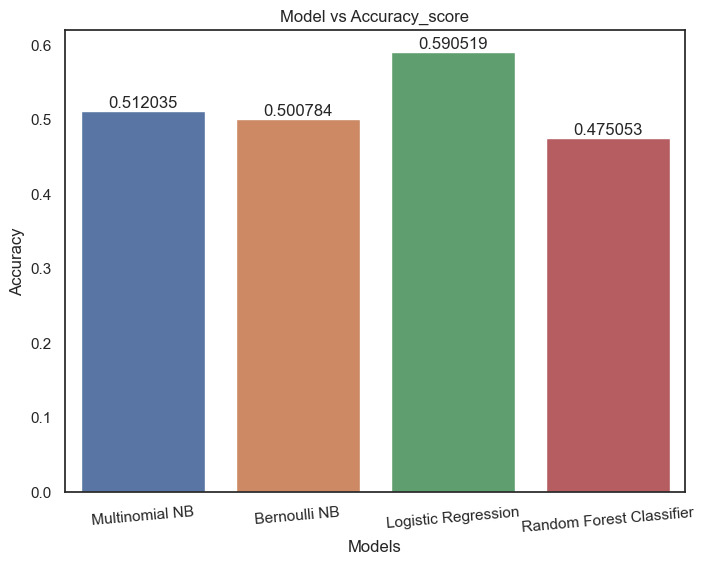

In [65]:
#Barplot of accuracies

plt.figure(figsize = (8, 6))

ax = sns.barplot(x = "Models", y = "Accuracy", data = FinalResult)
for i in ax.containers:
    ax.bar_label(i, )

plt.title('Model vs Accuracy_score')

plt.xticks(rotation = 5)

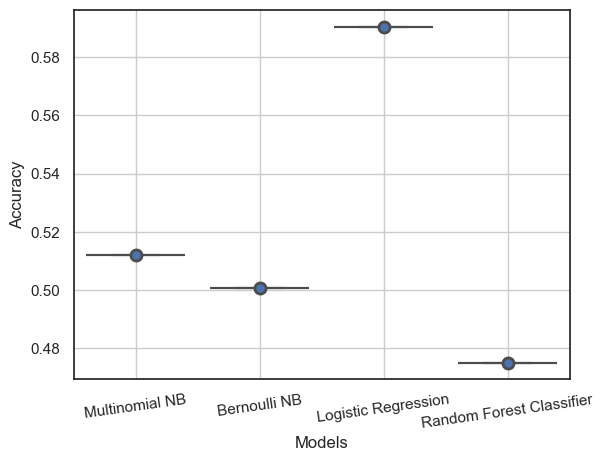

In [66]:
sns.boxplot(x='Models', y='Accuracy', data=FinalResult)

sns.stripplot(x='Models', y='Accuracy', data=FinalResult, size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.xticks(rotation = 8)
plt.grid()

In [67]:
sum = y_test_accuracy1 + y_test_accuracy2 + y_test_accuracy3 + y_test_accuracy4

size1 = (y_test_accuracy1/sum)
size2 = (y_test_accuracy2/sum)
size3 = (y_test_accuracy3/sum)
size4 = (y_test_accuracy4/sum)

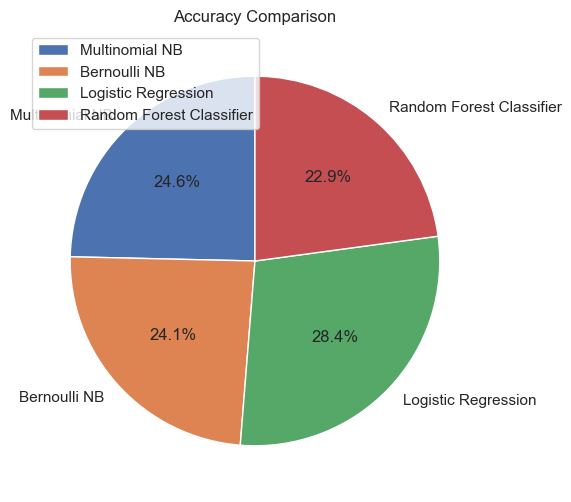

In [68]:
labels = ['Multinomial NB', 'Bernoulli NB', 'Logistic Regression', 'Random Forest Classifier']
sizes = [size1, size2, size3, size4]

# Plotting the pie chart
plt.figure(figsize=(8,6))

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Accuracy Comparison')

plt.legend()
plt.show()

In [69]:
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the training data
x_test_tfidf = tfidf_vectorizer.fit_transform(df_test['Description'])

In [70]:
x_test_predictions = model_3.predict(x_test_tfidf)

df_test['Predicted_Genre'] = x_test_predictions

In [71]:
df_test.to_csv('predicted_genres.csv', index=False)

print(df_test)

          Id                             Title  \
0          1             Edgar's Lunch (1998)    
1          2         La guerra de papá (1977)    
2          3      Off the Beaten Track (2010)    
3          4           Meu Amigo Hindu (2015)    
4          5                Er nu zhai (1955)    
...      ...                               ...   
54195  54196   "Tales of Light & Dark" (2013)    
54196  54197      Der letzte Mohikaner (1965)    
54197  54198              Oliver Twink (2007)    
54198  54199                Slipstream (1973)    
54199  54200        Curitiba Zero Grau (2010)    

                                             Description  length  \
0       L.R. Brane loves his life - his car, his apar...     510   
1       Spain, March 1964: Quico is a very naughty ch...     674   
2       One year in the life of Albin and his family ...     590   
3       His father has died, he hasn't spoken with hi...     681   
4       Before he was known internationally as a mart...   

In [72]:
# Predict genres for new descriptions
new_descriptions = [
    " L.R. Brane loves his life - his car, his apartment, his job, but especially his girlfriend, Vespa. One day while showering, Vespa runs out of shampoo. L.R. runs across the street to a convenience store to buy some more, a quick trip of no more than a few minutes. When he returns, Vespa is gone and every trace of her existence has been wiped out. L.R.'s life becomes a tortured existence as one strange event after another occurs to confirm in his mind that a conspiracy is working against his finding Vespa.",
    " Spain, March 1964: Quico is a very naughty child of three belonging to a wealthy middle-class family. Since Cristina's birth, he feels he has lost the privileged position of 'prince' of the house for his eight months old sister. So, with his brother Juan, who is eight years old and is quite disobedient, spend their time committing prank after prank, causing the resulting anger of his mother, the nanny and the old housemaid. The rest of the family members are two much older brothers, his resigned mother and a retrograde father of authoritarian ideas. But many years have passed, and the civil war that won the despot Don Pablo is simply for their children 'Dad's war'.",
    " One year in the life of Albin and his family of shepherds in the North of Transylvania. In direct cinema style, this documentary follows their day to day routines, and their struggle to adapt to a new world where traditions are gradually replaced by modern values. Since joining the EU, Romania has been facing, like several other Eastern European countries, the pressure of modern values, introducing in farmer's lives the cruel notion of competition, the temptation of migrating to the higher salaries abroad, and the marginalization of locally produced food against industrial products.",
    " His father has died, he hasn't spoken with his brother for about 10 years and has a serious cancer. Diego is a talented film director with difficulty to deal with his sickness, which is making him lose his friends and family. His best friend and doctor Ricardo gives him the news that he needs a bone marrow transplantation, otherwise he'll die. He gets married to a beautiful woman, Livia, just before going to Seattle to get treatment. There, he undergoes numerous medical procedures. During treatment, he meets an Hindu boy, with whom he plays and whom he tells amazing stories. Odds are against him and when stakes are the highest, Diego gets a visit from a very uncommon man.",
    " Before he was known internationally as a martial arts superstar, Bruce Lee had appeared in a handful of Hong Kong films as a child star in the 1940s/50s. One of these early films was The More the Merrier (1955), a.k.a. We Owe it to Our Children from the Union Film Enterprise, a family melodrama written and directed by renowned filmmaker Chin Chien (My Intimate Partners). Featuring the 14-year-old Bruce Lee and future Cantonese Opera star Yuen Siu Fai, the B&W film revolves around accountant Ming (played by Cheung Wood Yau) and his wife (Tsi Lo Lin) who suffers a miscarriage in an car accident. The couple decides to adopt a baby girl, not knowing that she's the daughter given up by Ming's poor co-worker who struggles to feed a bunch of kids. Bruce Lee plays the slacker son of the landlord (Ko Lo Chuen)."
]

# Vectorize new descriptions
new_descriptions_tfidf = tfidf_vectorizer.transform(new_descriptions)

# Predict genres
predicted_genres = model_3.predict(new_descriptions_tfidf)

for desc, genre in zip(new_descriptions, predicted_genres):
    print(f"Description: {desc}")
    print(f"Predicted Genre: {genre}")
    print()


Description:  L.R. Brane loves his life - his car, his apartment, his job, but especially his girlfriend, Vespa. One day while showering, Vespa runs out of shampoo. L.R. runs across the street to a convenience store to buy some more, a quick trip of no more than a few minutes. When he returns, Vespa is gone and every trace of her existence has been wiped out. L.R.'s life becomes a tortured existence as one strange event after another occurs to confirm in his mind that a conspiracy is working against his finding Vespa.
Predicted Genre:  drama 

Description:  Spain, March 1964: Quico is a very naughty child of three belonging to a wealthy middle-class family. Since Cristina's birth, he feels he has lost the privileged position of 'prince' of the house for his eight months old sister. So, with his brother Juan, who is eight years old and is quite disobedient, spend their time committing prank after prank, causing the resulting anger of his mother, the nanny and the old housemaid. The rest

In [73]:
test_path = "C:/Users/sanso/Desktop/CODSOFT/MOVIE GENRE CLASSIFICATION/Genre Classification Dataset/test_data_solution.txt"
df_test_sol = pd.read_csv(test_path, sep=':::', names=['Id', 'Title', 'Genre', 'Description'], engine='python')
df_test_sol

,Id,Title,Genre,Description
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...
...,...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)",horror,"Covering multiple genres, Tales of Light & Da..."
54196,54197,Der letzte Mohikaner (1965),western,As Alice and Cora Munro attempt to find their...
54197,54198,Oliver Twink (2007),adult,A movie 169 years in the making. Oliver Twist...
54198,54199,Slipstream (1973),drama,"Popular, but mysterious rock D.J Mike Mallard..."


In [74]:
df_test_sol.to_csv('test_solution.csv', index=False)

print(df_test_sol)

          Id                             Title          Genre  \
0          1             Edgar's Lunch (1998)       thriller    
1          2         La guerra de papá (1977)         comedy    
2          3      Off the Beaten Track (2010)    documentary    
3          4           Meu Amigo Hindu (2015)          drama    
4          5                Er nu zhai (1955)          drama    
...      ...                               ...            ...   
54195  54196   "Tales of Light & Dark" (2013)         horror    
54196  54197      Der letzte Mohikaner (1965)        western    
54197  54198              Oliver Twink (2007)          adult    
54198  54199                Slipstream (1973)          drama    
54199  54200        Curitiba Zero Grau (2010)          drama    

                                             Description  
0       L.R. Brane loves his life - his car, his apar...  
1       Spain, March 1964: Quico is a very naughty ch...  
2       One year in the life of Albin and 

In [75]:
df_test_sol['Genre']

0            thriller 
1              comedy 
2         documentary 
3               drama 
4               drama 
             ...      
54195          horror 
54196         western 
54197           adult 
54198           drama 
54199           drama 
Name: Genre, Length: 54200, dtype: object

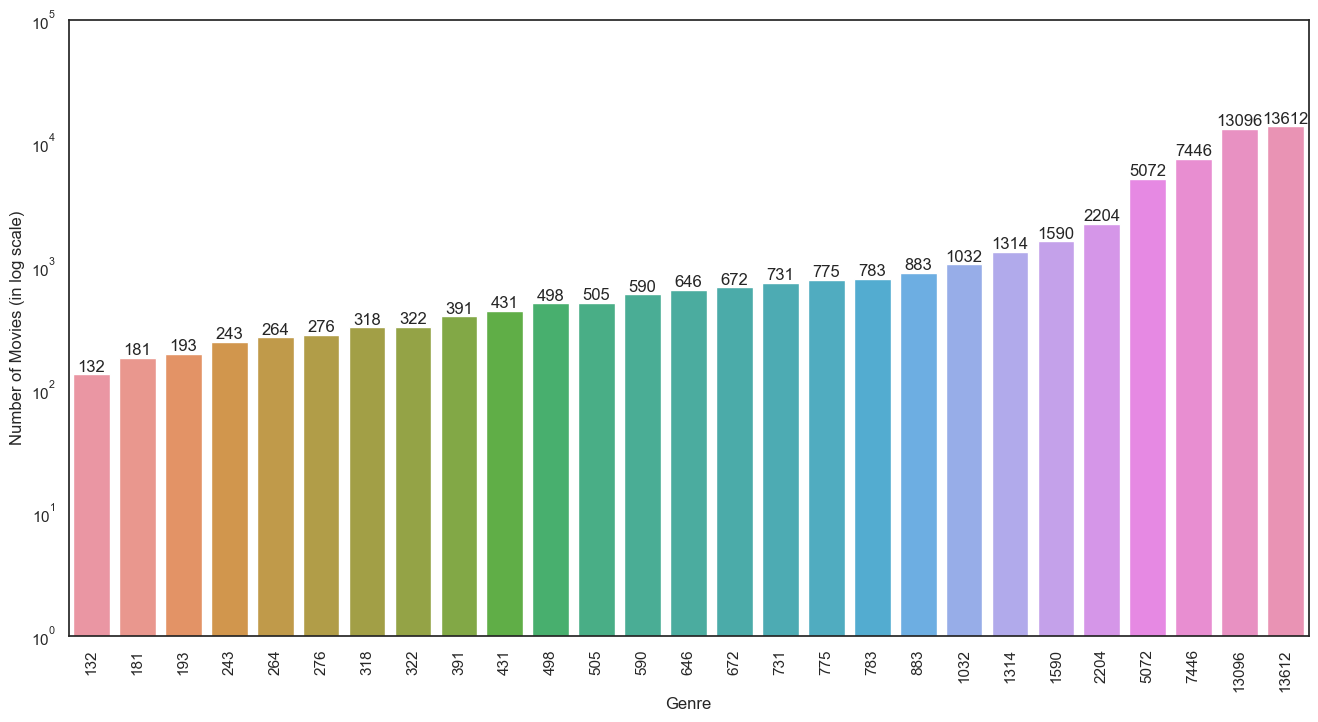

In [77]:
df_genres_per_movie = df_test_sol['Genre'].value_counts()

f, ax = plt.subplots(1, 1, figsize=(16, 8))
bx = sns.barplot(data=df_genres_per_movie, x=df_genres_per_movie.index, y=df_genres_per_movie.values, ax=ax)
ax.set(yscale='log', ylim=(1, 1e5), xlabel='Genre', ylabel='Number of Movies (in log scale)')

for i in bx.containers:
    bx.bar_label(i, )

plt.xticks(rotation=90)

plt.show()